In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('heatingOilTrainingset.csv')
data

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2
...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5
1214,5,78,129,1,22.5,1
1215,5,77,138,3,26.8,1
1216,3,89,156,2,34.0,2


# Business Understanding 
melvi aprilia, the regional sales manager she is back for more help. business is booming, hher sales team is signing up thousands of new clients, and shewants to be sure the company will be able to meet this new level of demand. she was so pleased with our assistance in finding correlations in her data, she now is hoping we can help her do some prediction as well. she knows that there is some correlation between the attributes in her datasets ( like temperature, insulation and occupant ages), and she's now wondering if she can use the dataset to predict heating oil usage for new customers. You, see these new customers haven't begun consuming heating oil yet, there are a lot of them (42,650 to be exact), and she wants to know how much oil she needs to expect to keep in stock in order to meet these new customer's demands, can she use data mining to examine household attributes and known past consumptions quantities to anticipate and meet her new customers needs?
Problem = Estimasi
Judul Skripsi = penerapan machine learning untuk mengamankan stok level heating oil dengan pendekatan analisa prediktif
Jeniss ML = supervised

Data training = valid historikal penjualan heating oil dengan merekap form pelanggan meliputi insulation, temperature, heating_oil,num_Occupants, avg_age dan home_size
kemungkinan algoritma yang akan digunakan:
1. Regresi linear
2. MLP Regressor (Artificial Neural Network)



# Data Understanding
As a review, our data set from Chapter 4 contains the following attributes:
Insulation: This is a density rating, ranging from one to ten, indicating the thickness of each home’s insulation. A home with a density rating of one is poorly insulated, while a home with a density of ten has excellent insulation.
-  Temperature: This is the average outdoor ambient temperature at each home for the most recent year, measure in degree Fahrenheit.
- Heating_Oil: This is the total number of units of heating oil purchased by the owner of each home in the most recent year.
- Num_Occupants: This is the total number of occupants living in each home.
- Avg_Age: This is the average age of those occupants.
- Home_Size: This is a rating, on a scale of one to eight, of the home’s overall size. The higher the number, the larger the home

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


# Syarat dari penyelesaian problem estimasi: tidak ada variabel data kategorik

tidak perlu melaakukan konversi data, disebabkan semua variabel numerik
tidak perlu mengisi missing values karena tidak ada values yang missing

In [4]:
data.isna().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

## Permodelan data

# Linear Regression

<Axes: title={'center': 'analisis Pearson Correlation'}>

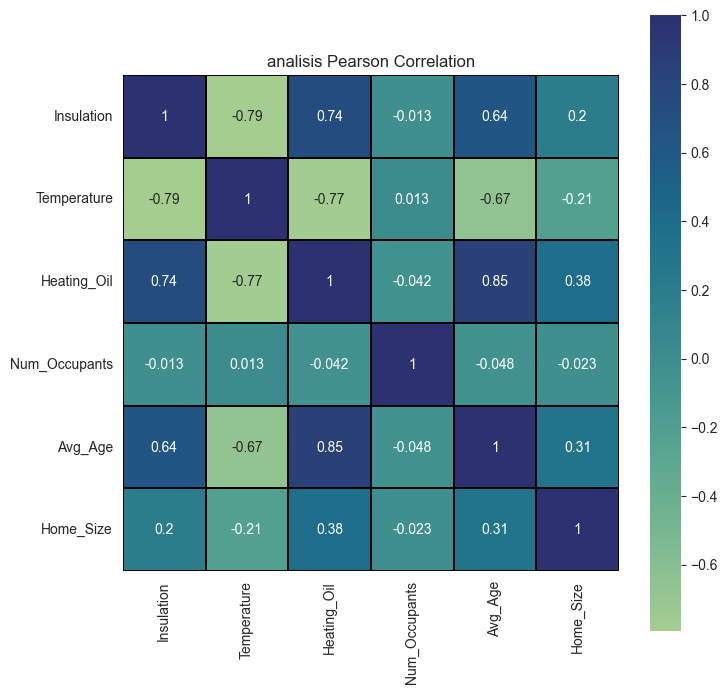

In [5]:
fig, ax = plt.subplots(figsize= (8,8))
plt.title("analisis Pearson Correlation")
sns.heatmap(data.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True, cmap='crest', linecolor='black', annot=True)

In [6]:
#Input Variabel
xinp = data[['Insulation','Temperature','Num_Occupants','Avg_Age','Home_Size']]

#Variabel Target
yinp = data['Heating_Oil']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
x_train, x_test, y_train, y_test = train_test_split(xinp,yinp, test_size=0.2, random_state= 1000 )

In [9]:
regressor = LinearRegression()
# Train Model
model_reg = regressor.fit(x_train, y_train)

# Memprediksi dengan data test
y_pred_reg = model_reg.predict(x_test)

In [10]:
# Evaluasi Regresi linear
print('R2_Score :', metrics.r2_score(y_test,y_pred_reg))

R2_Score : 0.804082545654656


In [11]:
y_test

628    153
167    179
299    146
345    129
429    161
      ... 
731    155
719    151
12     186
669    256
392    121
Name: Heating_Oil, Length: 244, dtype: int64

In [12]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape(y_test, y_pred_reg)

9.140123037467003

## hasil evaluasi pada model liniear regresion 
Baik karean R2 menunjukan nilai 0,8 mendekati 1,
artinya untuk menjadi excelent hanyak kurang 0,2

MAPE = 9,1 Artinya tingkat erro 9,1 dan tinggkat kesuksesan 90,9 %,

masi kurang 3 persen untuk masuk kesuksesan



## Pemodelan dengan MLP Regressor (ANN = Artificial Neural Network)

In [13]:
from sklearn.neural_network import MLPRegressor

In [14]:
# Create an instance of MLPRegressor with desired hyperparameters
mlp_reg = MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=1000, learning_rate='adaptive', random_state = 42)  # You can adjust hyperparameters as needed

# Train the model on the training data
model_mlp = mlp_reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred_mlp = model_mlp.predict(x_test)

In [15]:
#evaluasi linear regression
print('r2_score : ', metrics.r2_score(y_test, y_pred_mlp))

r2_score :  0.9124094231695845


In [16]:
print("MAPE : ", mape(y_test, y_pred_mlp))

MAPE :  5.143536101834354


## Hasil Evaluasi pemodelan neural network (MLP Regressor)

1, R2 Score : 0,912 dalam kategori cukup baik
2, MAPE : 5,143 % tingkat kesuksesan model = 94,587 %

Setelah melakukan tunning param maka model terbaik adalah MLP Regressor (dengan menambahkan 3 hidden layer) dengan MAPE 5,143 % artinya tingkat kesuksessan 94,587 %, R2 = 0,85.


In [17]:
data1 = pd.read_csv('heatingOilNewust.csv')
data1

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


In [19]:
x1 = data1[['Insulation', 'Temperature','Num_Occupants','Avg_Age','Home_Size']]
x1

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


In [20]:
y_pred1_mlp = model_mlp.predict(x1)


In [21]:
y_pred1_mlp

array([286.11722846, 181.41635006, 209.57763446, ..., 128.22482641,
       279.99704223, 218.71852447])

In [22]:
data_y_pred1_mlp = pd.DataFrame({'Prediction_HeatingOil':y_pred1_mlp}).round((2))
data_y_pred1_mlp

,Prediction_HeatingOil
0,286.12
1,181.42
2,209.58
3,220.26
4,157.19
...,...
42645,248.13
42646,201.32
42647,128.22
42648,280.00


In [23]:
# menggabungkan dataset newcust dengan hasil predict

data_hasil_pred = pd.concat([data1,data_y_pred1_mlp], sort=False, axis=1)

In [25]:
data_hasil_pred

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,Prediction_HeatingOil
0,5,69,10,70.1,7,286.12
1,5,80,1,66.7,1,181.42
2,4,89,9,67.8,7,209.58
3,7,81,9,52.4,6,220.26
4,4,58,8,22.9,7,157.19
...,...,...,...,...,...,...
42645,7,63,9,59.1,8,248.13
42646,7,84,1,43.6,5,201.32
42647,2,67,1,27.3,4,128.22
42648,8,58,1,65.7,3,280.00
